In [56]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imsave
from skimage.io import imread_collection, imread
import os
from PIL import Image
import pandas as pd

from histopy import HistoImage
from histopy.features import homogeneity, uniformity, variance, contrast, entropy, correlation

%matplotlib inline

In [22]:

'''
Capturando o caminho da pasta atual com 'os.getcwd()'.
Concatenando com a pasta 'imagens_teste' para obter acesso as imagens.
'''

IMAGE_FOLDER = 'imagens_teste'

full_directory = os.getcwd() + '/' + IMAGE_FOLDER + '/'
print("Diretório completo com as imagens: \n'{}'".format(full_directory))

Diretório completo com as imagens: 
'/mnt/hd/Estudos/Python/cientifico/PPGEE/Reconhecimento de Padrões/trabalho_final/visao_trabalho_final/GLCM e extraçao de caracteristicas/imagens_teste/'


In [28]:
images = imread_collection(full_directory+'*.jpg')

In [52]:

'''
Adicionando as imagens carregadas em uma lista
'''

image_list = []

for file in images.files:
    image_list.append(imread(file))

In [53]:
image_list

[array([[[207, 189, 165],
         [207, 189, 165],
         [208, 190, 166],
         ...,
         [199, 179, 154],
         [198, 178, 153],
         [197, 177, 152]],
 
        [[200, 183, 157],
         [199, 182, 156],
         [199, 182, 156],
         ...,
         [185, 165, 140],
         [183, 163, 138],
         [182, 162, 137]],
 
        [[196, 176, 149],
         [198, 178, 151],
         [200, 180, 153],
         ...,
         [182, 162, 135],
         [181, 161, 134],
         [179, 159, 132]],
 
        ...,
 
        [[183, 168, 139],
         [188, 173, 144],
         [190, 175, 146],
         ...,
         [158, 138, 113],
         [167, 147, 122],
         [181, 161, 136]],
 
        [[195, 179, 145],
         [195, 179, 145],
         [187, 171, 138],
         ...,
         [166, 146, 121],
         [169, 148, 121],
         [181, 160, 131]],
 
        [[197, 181, 147],
         [199, 183, 149],
         [192, 176, 143],
         ...,
         [194, 174, 149],
  

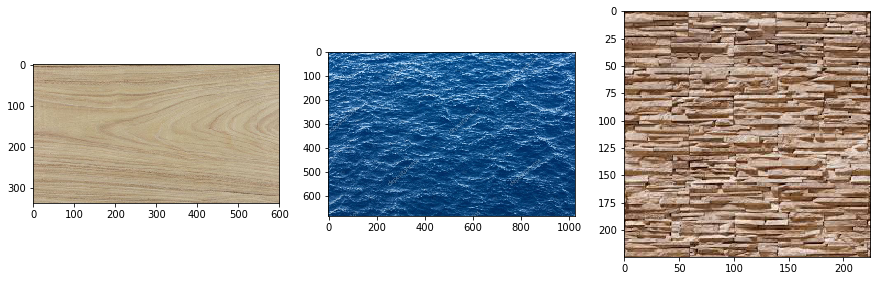

In [54]:
'''
Exibindo todas as imagens
'''

fig, ax = plt.subplots(1, 3, figsize=(15, 15))

for i, image in enumerate(image_list):
    ax[i].imshow(image, cmap='gray')

In [60]:
histo_list = []

for file in images.files:
    hi = HistoImage(file)
    hi.to_gray()
    histo_list.append(hi)
    

In [68]:
from collections import OrderedDict

glcm_imagem1 = histo_list[0].glcm()
glcm_imagem2 = histo_list[1].glcm()
glcm_imagem3 = histo_list[2].glcm()

print(histo_list[0].glcm())

data = OrderedDict(
{
#'homogeneity': [homogeneity(glcm_imagem1), homogeneity(glcm_imagem2), homogeneity(glcm_imagem3)],
#'variance': [variance(glcm_imagem1), variance(glcm_imagem2), variance(glcm_imagem3)],
'uniformity': [uniformity(glcm_imagem1), uniformity(glcm_imagem2), uniformity(glcm_imagem3)],
'contrast': [contrast(glcm_imagem1), contrast(glcm_imagem2), contrast(glcm_imagem3)],
'entropy': [entropy(glcm_imagem1), entropy(glcm_imagem2), entropy(glcm_imagem3)],
'correlation': [correlation(glcm_imagem1), correlation(glcm_imagem2), correlation(glcm_imagem3)],
'class':['madeira', 'oceano', 'parede']
})
    
df = pd.DataFrame(data)
df

Hidel function is running for east angle, distance 1 and normalize False...
Hidel function is running for east angle, distance 1 and normalize False...
Hidel function is running for east angle, distance 1 and normalize False...
Hidel function is running for east angle, distance 1 and normalize False...
[[202462]]


TypeError: list indices must be integers or slices, not tuple

In [3]:
imagem = HistoImage('dih.jpg')

In [4]:
imagem

<histopy image: 'dih.jpg', type: RGB>

In [5]:
imagem.to_gray()

In [6]:
imagem

<histopy image: 'dih.jpg', type: GRAY>

In [14]:
glcm_imagem = imagem.glcm(normalize=True)

Hidel function is running for east angle, distance 1 and normalize True...


In [15]:
homogeneity(glcm_imagem)

1.0164552136252005

In [16]:
variance(glcm_imagem)

0.5655010141402046

In [17]:
uniformity(glcm_imagem)

1.000270774055451

In [18]:
contrast(glcm_imagem)

0.0

In [19]:
entropy(glcm_imagem)

0.029351106542370622

In [20]:
correlation(glcm_imagem)

240.10050693776313